# Spam Message Classification

In [2]:
import pandas as pd
import numpy as np
import nltk

In [5]:
spam_df=pd.read_csv('spam.tsv',sep='\t')

In [6]:
spam_df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [7]:
spam_df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [10]:
spam_df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham_percent=(4825)*100/(5572)
ham_percent

86.59368269921033

In [ ]:
# ham sample is comparitively high

## Balancing Data

### UnderSampling majority class

In [14]:
sample_spam_df=spam_df[spam_df['label']=='spam']
sample_spam_df

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [15]:
sample_ham_df=spam_df[spam_df['label']=='ham']
sample_ham_dfb

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [18]:
balanced_ham_df=sample_ham_df.sample(747)
balanced_ham_df

,label,message,length,punct
1220,ham,True. It is passable. And if you get a high sc...,119,5
1563,ham,Dude just saw a parked car with its sunroof po...,58,1
581,ham,Huh so early.. Then ü having dinner outside iz...,50,3
4778,ham,Sorry completely forgot * will pop em round th...,73,2
4085,ham,Quite ok but a bit ex... U better go eat smth ...,74,7
...,...,...,...,...
658,ham,You will be in the place of that man,36,0
834,ham,Thank you so much. When we skyped wit kz and s...,215,8
4453,ham,I've told you everything will stop. Just dont ...,69,3
565,ham,"Fuck babe ... I miss you already, you know ? C...",146,16


In [21]:
df=sample_spam_df.append(balanced_ham_df,ignore_index=True)
df

,label,message,length,punct
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
1,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
2,spam,WINNER!! As a valued network customer you have...,157,6
3,spam,Had your mobile 11 months or more? U R entitle...,154,2
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
1489,ham,You will be in the place of that man,36,0
1490,ham,Thank you so much. When we skyped wit kz and s...,215,8
1491,ham,I've told you everything will stop. Just dont ...,69,3
1492,ham,"Fuck babe ... I miss you already, you know ? C...",146,16


In [22]:
df['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

## Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

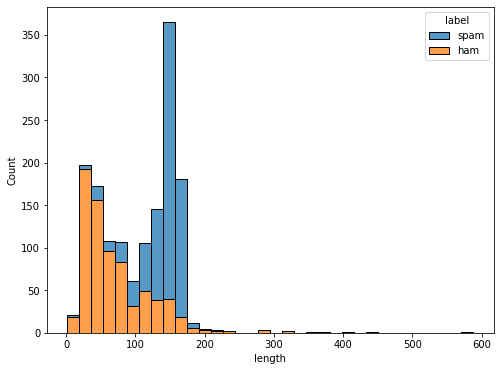

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='length',hue='label',multiple='stack')
plt.show()

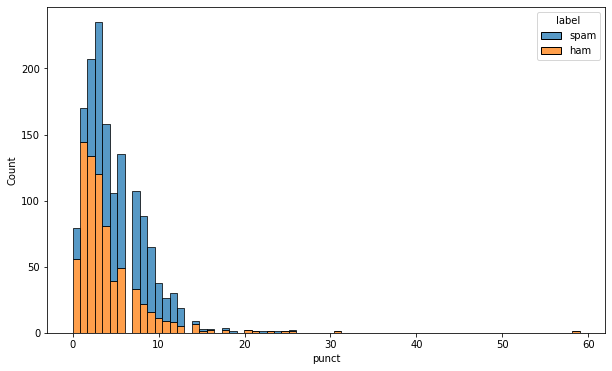

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='punct',hue='label',multiple='stack')
plt.show()

In [36]:
df=df.drop(['length','punct'],axis=1)
df

,label,message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
1489,ham,You will be in the place of that man
1490,ham,Thank you so much. When we skyped wit kz and s...
1491,ham,I've told you everything will stop. Just dont ...
1492,ham,"Fuck babe ... I miss you already, you know ? C..."


## Text Preprocessing

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(df['message'])
features=vectorizer.get_feature_names_out()
features

array(['00', '000', '008704050406', ..., 'zouk', 'zyada', 'ú1'],
      dtype=object)

## Train, Test And Spiting Data

In [40]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=0,shuffle=True)

In [43]:
x_train

465     URGENT! We are trying to contact U. Todays dra...
1229        The wine is flowing and i'm i have nevering..
1400    An excellent thought by a misundrstud frnd: I ...
1017                           Or remind me in a few hrs.
425     Not heard from U4 a while. Call 4 rude chat pr...
                              ...                        
763     Hi darlin im on helens fone im gonna b up the ...
835     Oh really? perform, write a paper, go to a mov...
1216                                        Ok. C u then.
559     Please call Amanda with regard to renewing or ...
684     83039 62735=£450 UK Break AccommodationVoucher...
Name: message, Length: 1195, dtype: object

In [45]:
y_train

465     spam
1229     ham
1400     ham
1017     ham
425     spam
        ... 
763      ham
835      ham
1216     ham
559     spam
684     spam
Name: label, Length: 1195, dtype: object

In [46]:
y_train.value_counts()

ham     599
spam    596
Name: label, dtype: int64

## Model Building

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(x_train, y_train)
# Predict the categories of the test data
predicted_categories = model.predict(x_test)

In [68]:
predicted_categories

array(['ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
       'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 

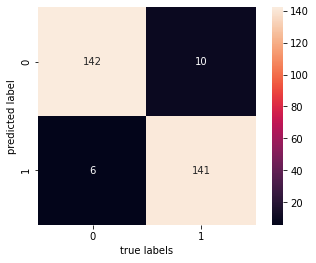

The accuracy is 0.9464882943143813


In [69]:
# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
# Build the model
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
# Train the model using the training data
model.fit(x_train, y_train)
# Predict the categories of the test data
predicted_categories = model.predict(x_test)

In [75]:
predicted_categories

array(['ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
       'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', '

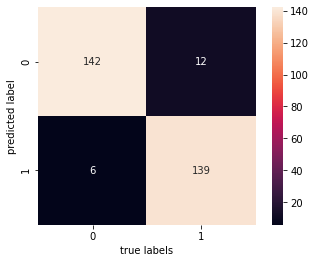

The accuracy is 0.939799331103679


In [76]:
# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))